## 步骤 1：数据加载和初步检查

In [5]:
import pandas as pd

# 加载数据
df = pd.read_csv('/home/ecs-user/code/happen/kaggle-csrio/csiro-biomass/train.csv')

# 查看数据的基本信息
df.info()

# 查看前几行数据
df.head()

# 查看是否有缺失值
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      1785 non-null   object 
 1   image_path     1785 non-null   object 
 2   Sampling_Date  1785 non-null   object 
 3   State          1785 non-null   object 
 4   Species        1785 non-null   object 
 5   Pre_GSHH_NDVI  1785 non-null   float64
 6   Height_Ave_cm  1785 non-null   float64
 7   target_name    1785 non-null   object 
 8   target         1785 non-null   float64
dtypes: float64(3), object(6)
memory usage: 125.6+ KB


sample_id        0
image_path       0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
target_name      0
target           0
dtype: int64

## 步骤 2：探索分类特征（如 State, Species）

In [6]:
print("========State=========")
print(df['State'].value_counts())
print("========Species=========")
print(df['Species'].value_counts())

========State=========
State
Tas    690
Vic    560
NSW    375
WA     160
Name: count, dtype: int64
========Species=========
Species
Ryegrass_Clover                                                490
Ryegrass                                                       310
Phalaris_Clover                                                210
Clover                                                         205
Fescue                                                         140
Lucerne                                                        110
Phalaris_BarleyGrass_SilverGrass_SpearGrass_Clover_Capeweed     55
Fescue_CrumbWeed                                                50
WhiteClover                                                     50
Phalaris                                                        40
Phalaris_Ryegrass_Clover                                        40
Phalaris_Clover_Ryegrass_Barleygrass_Bromegrass                 35
SubcloverLosa                                                   

In [7]:
from scipy.stats import chi2_contingency

# 使用 crosstab 查看每个 State 中不同 Species 的分布情况
species_per_state = pd.crosstab(df['State'], df['Species'])
# 使用卡方检验来检验 State 和 Species 是否相关
chi2_stat, p_val, dof, expected = chi2_contingency(species_per_state)

# 输出卡方检验结果
print("\n卡方检验的 p 值为：", p_val)
print("如果 p 值小于 0.05，说明 State 和 Species 存在显著的相关性")


卡方检验的 p 值为： 0.0
如果 p 值小于 0.05，说明 State 和 Species 存在显著的相关性


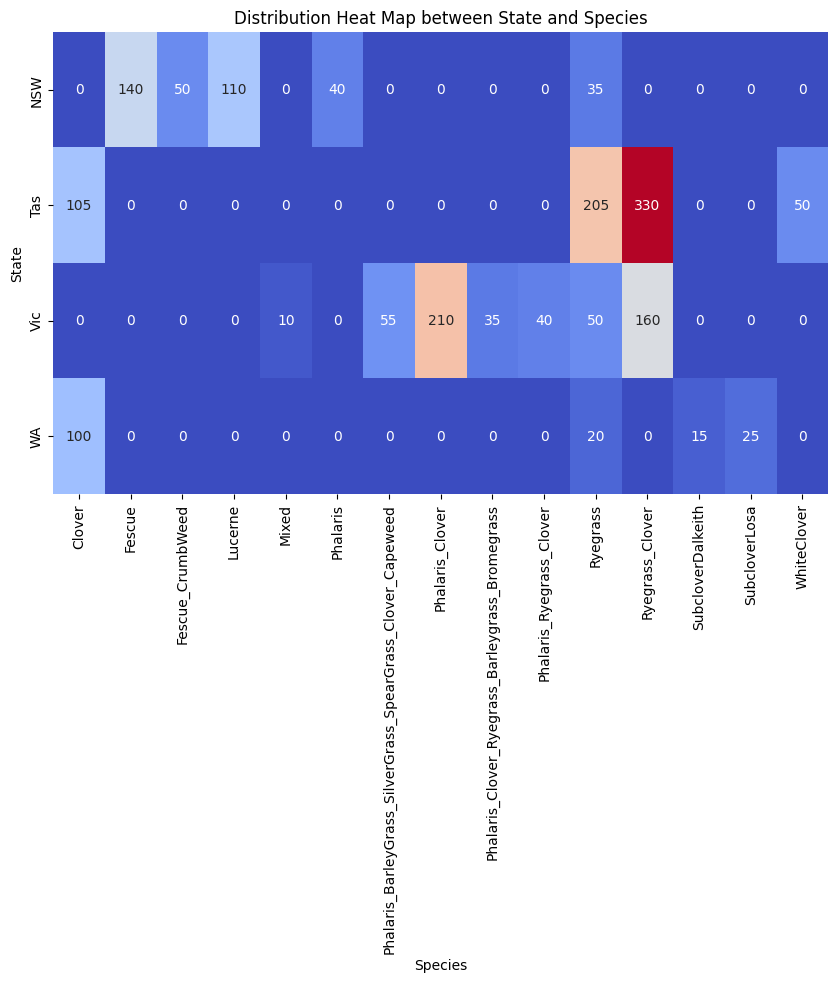

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制每个 State 中不同 Species 的热图
plt.figure(figsize=(10, 6))
sns.heatmap(species_per_state, annot=True, cmap='coolwarm', fmt="d", cbar=False)
plt.title("Distribution Heat Map between State and Species")
plt.xlabel("Species")
plt.ylabel("State")
plt.show()


## 步骤 3：探索连续特征（如 Pre_GSHH_NDVI, Height_Ave_cm）

       Pre_GSHH_NDVI  Height_Ave_cm
count    1785.000000    1785.000000
mean        0.657423       7.595985
std         0.151972      10.273725
min         0.160000       1.000000
25%         0.560000       3.000000
50%         0.690000       4.000000
75%         0.770000       7.000000
max         0.910000      70.000000


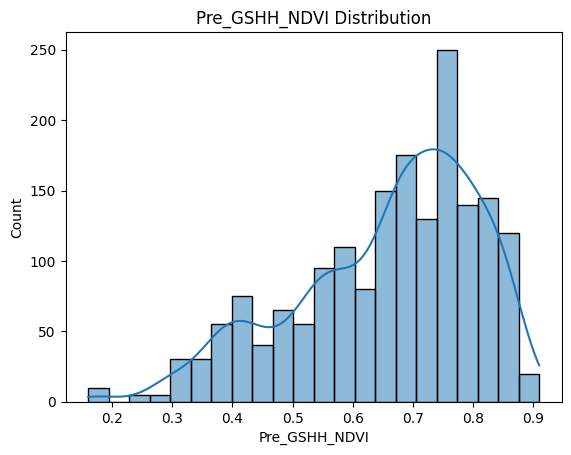

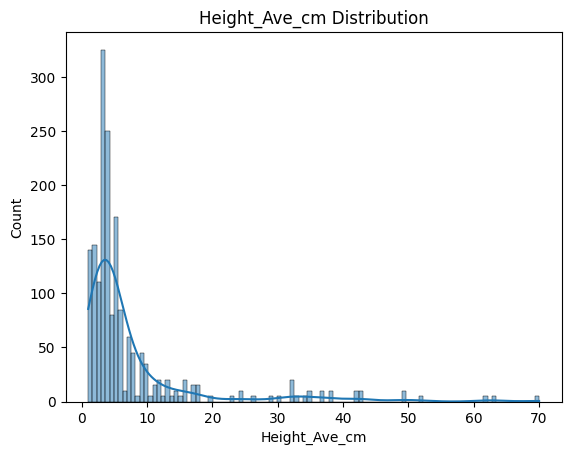

In [9]:
# 查看连续特征的基本统计信息
print(df[['Pre_GSHH_NDVI', 'Height_Ave_cm']].describe())

# 可视化分布
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制 Pre_GSHH_NDVI 和 Height_Ave_cm 的分布图
sns.histplot(df['Pre_GSHH_NDVI'], kde=True)
plt.title('Pre_GSHH_NDVI Distribution')
plt.show()

sns.histplot(df['Height_Ave_cm'], kde=True)
plt.title('Height_Ave_cm Distribution')
plt.show()


## 步骤 4：探索日期特征（Sampling_Date）

In [10]:
# 将 Sampling_Date 转换为 datetime 类型
df['Sampling_Date'] = pd.to_datetime(df['Sampling_Date'])

# 提取季节信息
df['month'] = df['Sampling_Date'].dt.month
df['season'] = df['month'].apply(lambda x: 'summer' if x in [12, 1, 2] else 
                                              'autumn' if x in [3, 4, 5] else
                                              'winter' if x in [6, 7, 8] else 'spring')

# 查看季节分布
print(df['season'].value_counts())

season
spring    665
winter    655
autumn    260
summer    205
Name: count, dtype: int64


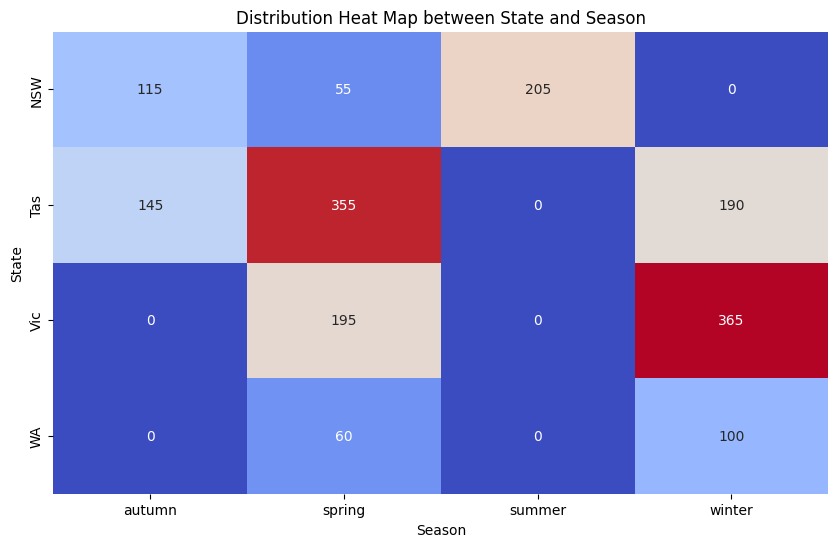

In [ ]:
season_per_state = pd.crosstab(df['State'], df['season'])

import seaborn as sns
import matplotlib.pyplot as plt

# 绘制每个 State 中不同 Season 的热图
plt.figure(figsize=(10, 6))
sns.heatmap(season_per_state, annot=True, cmap='coolwarm', fmt="d", cbar=False)
plt.title("Distribution Heat Map between State and Season")
plt.xlabel("Season")
plt.ylabel("State")
plt.show()


## 步骤5 探索特征相关性

In [12]:
df['image_id'] = df['sample_id'].str.split('__').str[0]
df_pivot = df.pivot_table(index=['image_id', 'image_path', 'Sampling_Date', 'State', 'Species', 'Pre_GSHH_NDVI', 'Height_Ave_cm'],
                          columns='target_name', values='target', aggfunc='first').reset_index()

In [13]:
df_pivot

target_name,image_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,Dry_Clover_g,Dry_Dead_g,Dry_Green_g,Dry_Total_g,GDM_g
0,ID1011485656,train/ID1011485656.jpg,2015-09-04,Tas,Ryegrass_Clover,0.62,4.6667,0.0000,31.9984,16.2751,48.2735,16.2750
1,ID1012260530,train/ID1012260530.jpg,2015-04-01,NSW,Lucerne,0.55,16.0000,0.0000,0.0000,7.6000,7.6000,7.6000
2,ID1025234388,train/ID1025234388.jpg,2015-09-01,WA,SubcloverDalkeith,0.38,1.0000,6.0500,0.0000,0.0000,6.0500,6.0500
3,ID1028611175,train/ID1028611175.jpg,2015-05-18,Tas,Ryegrass,0.66,5.0000,0.0000,30.9703,24.2376,55.2079,24.2376
4,ID1035947949,train/ID1035947949.jpg,2015-09-11,Tas,Ryegrass,0.54,3.5000,0.4343,23.2239,10.5261,34.1844,10.9605
...,...,...,...,...,...,...,...,...,...,...,...,...
352,ID975115267,train/ID975115267.jpg,2015-07-08,WA,Clover,0.73,3.0000,40.0300,0.0000,0.8000,40.8300,40.8300
353,ID978026131,train/ID978026131.jpg,2015-09-04,Tas,Clover,0.83,3.1667,24.6445,4.1948,12.0601,40.8994,36.7046
354,ID980538882,train/ID980538882.jpg,2015-02-24,NSW,Phalaris,0.69,29.0000,0.0000,1.1457,91.6543,92.8000,91.6543
355,ID980878870,train/ID980878870.jpg,2015-07-08,WA,Clover,0.74,2.0000,32.3575,0.0000,2.0325,34.3900,34.3900


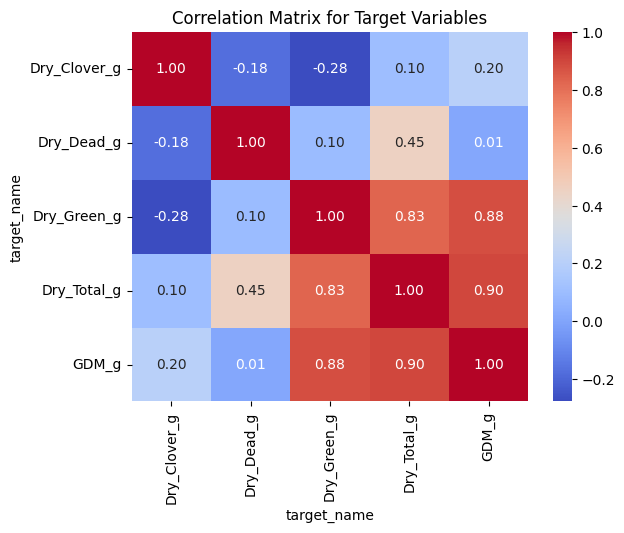

In [14]:
# 查看目标变量之间的相关性
target_columns = ['Dry_Clover_g', 'Dry_Dead_g', 'Dry_Green_g', 'Dry_Total_g', 'GDM_g']
correlation_matrix = df_pivot[target_columns].corr()

# 绘制相关性矩阵
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Target Variables')
plt.show()

## 步骤6 验证数据规律

In [15]:
## 验证 Dry_Total_g = Dry_Clover_g + Dry_Dead_g + Dry_Green_g
df_pivot['calculated_Dry_Total'] = df_pivot['Dry_Clover_g'] + df_pivot['Dry_Dead_g'] + df_pivot['Dry_Green_g']

df_pivot['is_valid'] = abs(df_pivot['Dry_Total_g'] - df_pivot['calculated_Dry_Total']) <= 0.001

print(df_pivot)

valid_count = df_pivot['is_valid'].sum()
print(f"is_valid 为 True 的样本数: {valid_count}")
df_pivoe_not_valid = df_pivot[df_pivot['is_valid'] == False]
print(df_pivoe_not_valid)

target_name      image_id              image_path Sampling_Date State  \
0            ID1011485656  train/ID1011485656.jpg    2015-09-04   Tas   
1            ID1012260530  train/ID1012260530.jpg    2015-04-01   NSW   
2            ID1025234388  train/ID1025234388.jpg    2015-09-01    WA   
3            ID1028611175  train/ID1028611175.jpg    2015-05-18   Tas   
4            ID1035947949  train/ID1035947949.jpg    2015-09-11   Tas   
..                    ...                     ...           ...   ...   
352           ID975115267   train/ID975115267.jpg    2015-07-08    WA   
353           ID978026131   train/ID978026131.jpg    2015-09-04   Tas   
354           ID980538882   train/ID980538882.jpg    2015-02-24   NSW   
355           ID980878870   train/ID980878870.jpg    2015-07-08    WA   
356           ID983582017   train/ID983582017.jpg    2015-09-01    WA   

target_name            Species  Pre_GSHH_NDVI  Height_Ave_cm  Dry_Clover_g  \
0              Ryegrass_Clover           0.62

In [16]:
## 验证GDM_g = Dry_Clover_g + Dry_Green_g

df_pivot['calculated_GDM'] = df_pivot['Dry_Clover_g'] + df_pivot['Dry_Green_g']
df_pivot['is_valid_GDM'] = abs(df_pivot['GDM_g'] - df_pivot['calculated_GDM']) <= 0.001

print(df_pivot[['image_id', 'GDM_g', 'calculated_GDM', 'is_valid_GDM']])

valid_count_GDM = df_pivot['is_valid_GDM'].sum()
print(f"is_valid_GDM 为 True 的样本数: {valid_count_GDM}")
df_pivoe_not_valid_GDM = df_pivot[df_pivot['is_valid_GDM'] == False]
print(df_pivoe_not_valid_GDM)

target_name      image_id    GDM_g  calculated_GDM  is_valid_GDM
0            ID1011485656  16.2750         16.2751          True
1            ID1012260530   7.6000          7.6000          True
2            ID1025234388   6.0500          6.0500          True
3            ID1028611175  24.2376         24.2376          True
4            ID1035947949  10.9605         10.9604          True
..                    ...      ...             ...           ...
352           ID975115267  40.8300         40.8300          True
353           ID978026131  36.7046         36.7046          True
354           ID980538882  91.6543         91.6543          True
355           ID980878870  34.3900         34.3900          True
356           ID983582017  40.9400         40.9400          True

[357 rows x 4 columns]
is_valid_GDM 为 True 的样本数: 357
Empty DataFrame
Columns: [image_id, image_path, Sampling_Date, State, Species, Pre_GSHH_NDVI, Height_Ave_cm, Dry_Clover_g, Dry_Dead_g, Dry_Green_g, Dry_Total_g, GDM_g

## Fold 划分check

In [19]:
import numpy as np

def entropy(p, eps=1e-12):
    p = np.asarray(p, dtype=float)
    p = p[p > 0]
    p = np.clip(p, eps, 1.0)
    return float(-(p * np.log(p)).sum())

def norm_entropy(p):
    # 归一化到 [0,1]，便于不同类别数对比
    p = np.asarray(p, dtype=float)
    k = (p > 0).sum()
    if k <= 1:
        return 0.0
    return entropy(p) / np.log(k)

def perplexity(p):
    # 有效类别数 = exp(H)
    return float(np.exp(entropy(p)))

# 2.1 每个 State 的 season 集中度
p_state_season = season_per_state.div(season_per_state.sum(axis=1), axis=0)
state_season_stats = pd.DataFrame({
    "n_images": season_per_state.sum(axis=1),
    "H_norm": p_state_season.apply(norm_entropy, axis=1),
    "perplexity": p_state_season.apply(perplexity, axis=1),
    "top_season": p_state_season.idxmax(axis=1),
    "top_season_share": p_state_season.max(axis=1),
}).sort_values(["H_norm","n_images"])

state_season_stats

,n_images,H_norm,perplexity,top_season,top_season_share
State,,,,,
NSW,375,0.886718,2.648939,summer,0.546667
Vic,560,0.932463,1.908532,winter,0.651786
Tas,690,0.932869,2.786709,spring,0.514493
WA,160,0.954434,1.937819,winter,0.625000


In [26]:
# 以 Species 为中心，看它分布在哪些 State
ct_species_state = pd.crosstab(df["Species"], df["State"])
p_species_state = ct_species_state.div(ct_species_state.sum(axis=1), axis=0)

species_state_stats = pd.DataFrame({
    "n_images": ct_species_state.sum(axis=1),
    "H_norm": p_species_state.apply(norm_entropy, axis=1),     # 越低越像“某州专属”
    "perplexity": p_species_state.apply(perplexity, axis=1),
    "top_state": p_species_state.idxmax(axis=1),
    "top_state_share": p_species_state.max(axis=1),
}).sort_values(["H_norm","n_images"])

# 看“最像州指纹”的 Species（建议先过滤样本太少的）
species_state_stats.query("n_images >= 1").head(20)

,n_images,H_norm,perplexity,top_state,top_state_share
Species,,,,,
Mixed,10,0.000000,1.000000,Vic,1.000000
SubcloverDalkeith,15,0.000000,1.000000,WA,1.000000
SubcloverLosa,25,0.000000,1.000000,WA,1.000000
Phalaris_Clover_Ryegrass_Barleygrass_Bromegrass,35,0.000000,1.000000,Vic,1.000000
Phalaris,40,0.000000,1.000000,NSW,1.000000
Phalaris_Ryegrass_Clover,40,0.000000,1.000000,Vic,1.000000
Fescue_CrumbWeed,50,0.000000,1.000000,NSW,1.000000
WhiteClover,50,0.000000,1.000000,Tas,1.000000
Phalaris_BarleyGrass_SilverGrass_SpearGrass_Clover_Capeweed,55,0.000000,1.000000,Vic,1.000000


In [27]:
from scipy.stats import chi2_contingency

def cramers_v(confusion):
    chi2, p, dof, exp = chi2_contingency(confusion)
    n = confusion.to_numpy().sum()
    r, k = confusion.shape
    return float(np.sqrt((chi2 / n) / (min(r-1, k-1) + 1e-12))), float(p)

v_ss, p_ss = cramers_v(ct_species_state)
v_sse, p_sse = cramers_v(season_per_state)

print("Cramér's V(State, Species) =", v_ss, "p=", p_ss)
print("Cramér's V(State, Season)  =", v_sse, "p=", p_sse)

Cramér's V(State, Species) = 0.7920044445568427 p= 0.0
Cramér's V(State, Season)  = 0.5035658056819703 p= 9.571657440375749e-287


In [ ]:
# 假设 meta 里已经有 fold
# meta = meta.merge(fold_df[["image_id","fold"]], on="image_id", how="left")

def fold_crosstab(meta, row, col):
    out = {}
    for f in sorted(meta["fold"].dropna().unique()):
        c = pd.crosstab(meta.loc[meta["fold"]==f, row], meta.loc[meta["fold"]==f, col])
        out[f] = c
    return out

# 6.1 每折 State×Season 覆盖率（哪些组合在某折消失）
for f, c in fold_crosstab(meta, "State", "Season").items():
    print("fold", f, "zero_cells=", (c==0).sum().sum(), "shape=", c.shape)

# 6.2 每折 State×Species 覆盖率（更敏感）
for f, c in fold_crosstab(meta, "State", "Species").items():
    print("fold", f, "zero_cells=", (c==0).sum().sum(), "shape=", c.shape)